# Assignment 3: Retrieval-Augmented Generation Question Answering
**Assignment due 2 April 11:59pm**

Welcome to the third assignment for 50.055 Machine Learning Operations. These assignments give you a chance to practice the methods and tools you have learned. 

**This assignment is a group assignment.**

- Read the instructions in this notebook carefully
- Add your solution code and answers in the appropriate places. The questions are marked as **QUESTION:**, the places where you need to add your code and text answers are marked as **ADD YOUR SOLUTION HERE**
- The completed notebook, including your added code and generated output will be your submission for the assignment.
- The notebook should execute without errors from start to finish when you select "Restart Kernel and Run All Cells..". Please test this before submission.
- Use the SUTD Education Cluster to solve and test the assignment.

**Rubric for assessment** 

Your submission will be graded using the following criteria. 
1. Code executes: your code should execute without errors. The SUTD Education cluster should be used to ensure the same execution environment.
2. Correctness: the code should produce the correct result or the text answer should state the factual correct answer.
3. Style: your code should be written in a way that is clean and efficient. Your text answers should be relevant, concise and easy to understand.
4. Partial marks will be awarded for partially correct solutions.
5. There is a maximum of 178 points for this assignment.

**ChatGPT policy** 

If you use AI tools, such as ChatGPT, to solve the assignment questions, you need to be transparent about its use and mark AI-generated content as such. In particular, you should include the following in addition to your final answer:
- A copy or screenshot of the prompt you used
- The name of the AI model
- The AI generated output
- An explanation why the answer is correct or what you had to change to arrive at the correct answer

**Assignment Notes:** Please make sure to save the notebook as you go along. Submission Instructions are located at the bottom of the notebook.



### Retrieval-Augmented Generation (RAG) 

In this assignment you will be building a Retrieval-Augmented Generation (RAG) question answering system which can answer questions about SUTD.

Retrieval-Augmented Generation (RAG) is a natural language processing (NLP) model that combines both retrieval and generation techniques. It involves retrieving relevant information from a large external knowledge source, such as a document database, and then utilizing that information to generate coherent and contextually appropriate responses. RAG models are designed to enhance the performance of language generation tasks by leveraging the power of pre-existing knowledge during the generation process.

We'll be leveraging `langchain` and `llama 2`.

Check out the docs:
- [LangChain](https://docs.langchain.com/docs/)
- [LLaMA 2](https://huggingface.co/blog/llama2)


The SUTD website already allows chatting with current students or submissions of questions via a web form. 

- https://www.sutd.edu.sg/Admissions/Undergraduate/AskAdmissions/Prospective-student-parent
- https://www.sutd.edu.sg/Admissions/chat


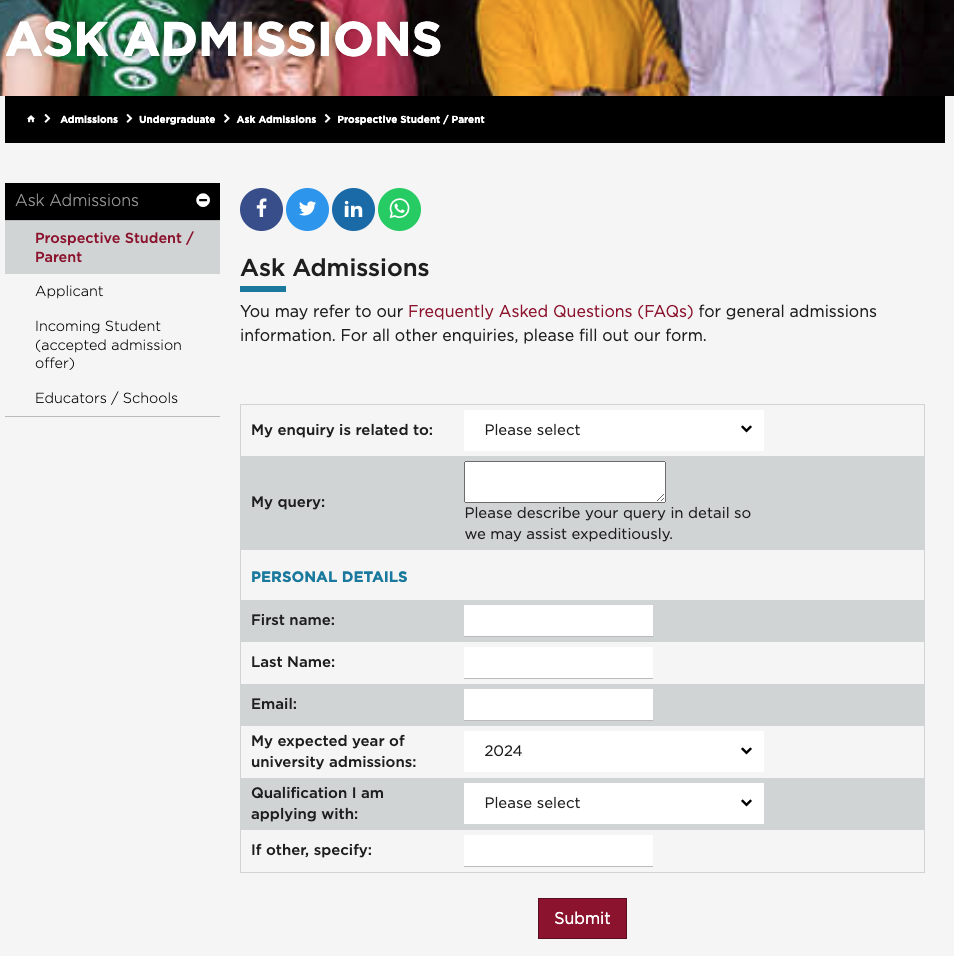



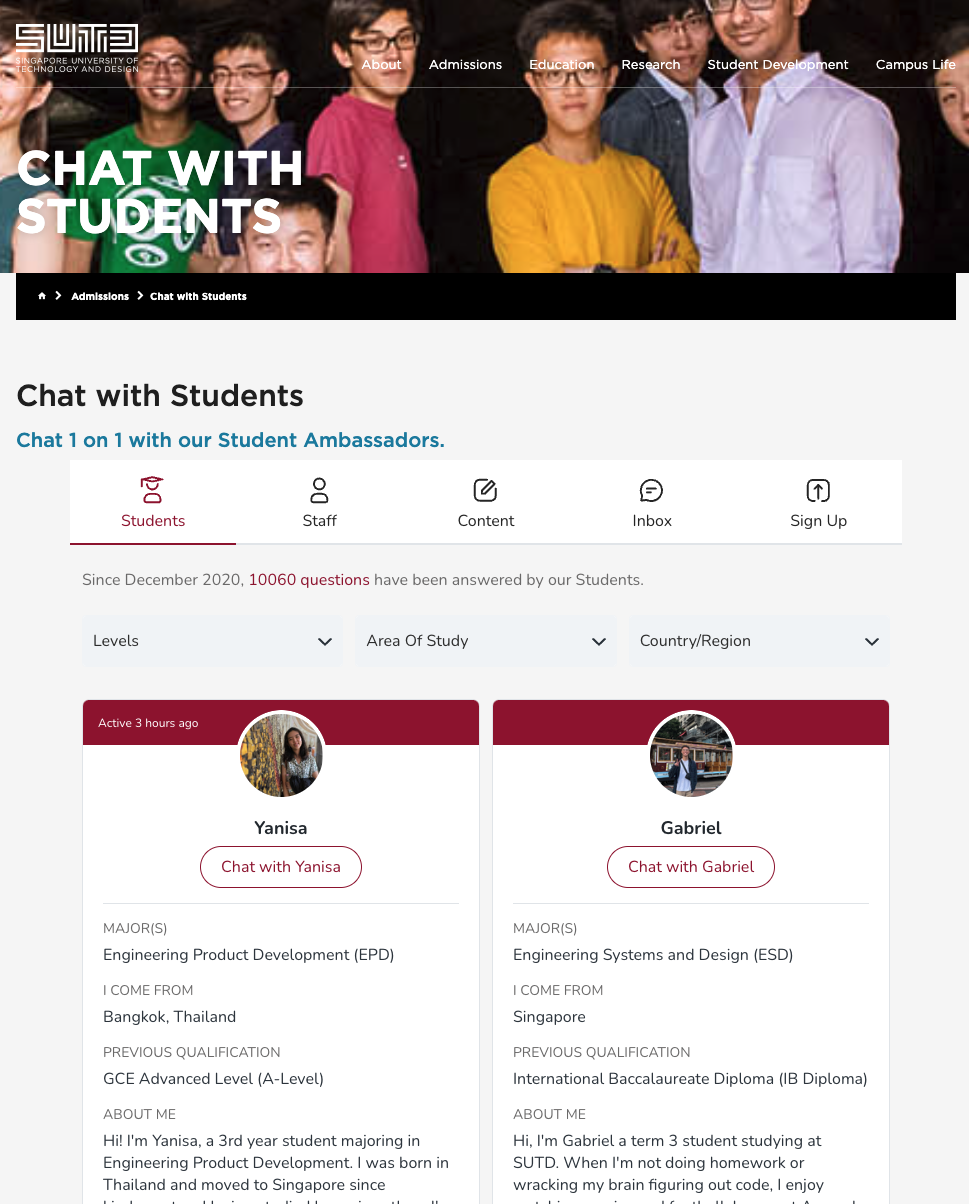




### Conduct user research

What are the questions that prospective and current students have about SUTD? Before you start building a question-answering system, let us first try to understand the users.

### QUESTION: 

Conduct user research by interviewing minimal 3 first-year students at SUTD about what questions they had when they were considering SUTD and what questions they had and have now that they are at SUTD. 

Enter your interview notes (not full transcripts, just bullet point notes).


**--- ADD YOUR SOLUTION HERE (20 points) ---**

**Finances, Financial Aid & Scholarships**

1. How do I apply for scholarships at SUTD?
2. How do I apply for financial aid?
3. How much are the tuition fees?

**Hostel**

1. Must I stay in hostel for my Freshmore term?
2. How difficult is it to secure further hostel stays after the first two terms?
3. Is there financial aid for hostel?
4. How much does it cost to stay in hostel?
 
**Overseas Opportunities**

1. What are the overseas opportunities in SUTD?
2. What are the subsidies available for us to participate in the Summer & GLP programmes?
3. What are the key differences between Summer and other overseas programmes? Why should I even consider Summer?
4. What is GEXP?
5. What is FACT?
6. Who can apply for FACT?

**Pillars**
1. When do I choose my pillar in SUTD?
2. When is the start of term/academic year?
3. What is ASD?
4. Is ASD recognised or accredited?
5. What are job prospects for ASD?
6. What is ESD?
7. Is there a lot of math and programming in ESD?
8. What is EPD?
9. What is ISTD?
10. What is DAI?
11. Why is SUTD launching the new Design and AI (DAI) degree?

**Special Programmes**
1. What is STEP?
2. What is SHARP?
3. What is SUTD Duke-NUS Special Track?
3. What are the admission requirements for SUTD-Duke-NUS Special Track or SHARP or STEP?


**Others**
1. How do I travel to SUTD?
2. What can I expect during an admissions/scholarship interview?

------------------------------


### Value Proposition Canvas


### QUESTION: 

Summarize what you have learned in a value proposition canvas. 

List the "jobs to be done" of your customer (i.e. the students) together with their "pains" and "gains" on the right side of the canvas. Then design the value proposition for an automatic 
question-answering system which could address these needs. Include features of this system in the section "products and services", "gain creators" and "pain relievers".
Add your points to the value proposition canvas template below by downloading the image, adding your points using Preview, Powerpoint or any image editing tool you like and then replacing the canvas image in this notebook.

You can find our more about the value proposition canvas under https://www.strategyzer.com/library/the-value-proposition-canvas


**--- ADD YOUR SOLUTION HERE (10 points) ---**

Refer to the file titled "VPC.png" to read our Value proposition Canvas
![VPC.png](./VPC.png)

------------------------------


In [1]:
# Installing all required packages
# Note: Do not add to this list.
# ----------------
! pip install -U "langchain==0.1.6" "transformers==4.32.0" "datasets==2.13.0" "peft==0.4.0" "accelerate==0.21.0" "bitsandbytes==0.40.2" "trl==0.4.7" "safetensors>=0.3.1"
! pip install -U faiss-cpu==1.7.4
! pip install tiktoken==0.6.0
! pip install sentence-transformers==2.3.1
! pip install pypdf==4.0.1
! pip install protobuf==4.25.2
! pip install lxml==5.1.0
# ----------------


  Using cached langchain-0.1.6-py3-none-any.whl.metadata (13 kB)
  Using cached transformers-4.32.0-py3-none-any.whl.metadata (118 kB)
  Using cached datasets-2.13.0-py3-none-any.whl.metadata (20 kB)
  Using cached peft-0.4.0-py3-none-any.whl.metadata (21 kB)
  Using cached accelerate-0.21.0-py3-none-any.whl.metadata (17 kB)
  Using cached bitsandbytes-0.40.2-py3-none-any.whl.metadata (9.8 kB)
  Using cached trl-0.4.7-py3-none-any.whl.metadata (10 kB)
  Using cached safetensors-0.4.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (3.8 kB)
  Using cached dataclasses_json-0.6.4-py3-none-any.whl.metadata (25 kB)
  Using cached langchain_community-0.0.29-py3-none-any.whl.metadata (8.3 kB)
  Using cached langchain_core-0.1.36-py3-none-any.whl.metadata (6.0 kB)
  Using cached langsmith-0.0.92-py3-none-any.whl.metadata (9.9 kB)
  Using cached pydantic-2.6.4-py3-none-any.whl.metadata (85 kB)
  Using cached tenacity-8.2.3-py3-none-any.whl.metadata (1.0 kB)
  Using cached hu

In [2]:
# Importing all required packages
# ----------------
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.embeddings import CacheBackedEmbeddings, HuggingFaceEmbeddings
from langchain.document_loaders import PyPDFLoader
from langchain.vectorstores import FAISS
from langchain.storage import LocalFileStore
from langchain.llms import HuggingFacePipeline
from langchain.chains import RetrievalQA
from langchain.callbacks import StdOutCallbackHandler
from langchain_community.document_loaders import BSHTMLLoader

import transformers
import torch
import timeit
import re
# ----------------

# Setting seed for transformer library for reproducibility
from transformers import set_seed
set_seed(42)

# Download PDF documents
The RAG application should be able to answer questions based on ingested documents. In this example, we will download a couple of PDF and html files with information from the SUTD website.


In [3]:
# Download SUTD's annual reports
! mkdir -p ./data

! wget -P data -c https://www.sutd.edu.sg/SUTD/media/SUTD/SUTD_AnnualReport_2022_23.pdf
! wget -P data -c https://www.sutd.edu.sg/SUTD/media/SUTD/SUTD_AnnualReport_2021.pdf
! wget -P data -c https://www.sutd.edu.sg/SUTD/media/SUTD/SUTD_AnnualReport_2020.pdf


--2024-03-30 11:40:32--  https://www.sutd.edu.sg/SUTD/media/SUTD/SUTD_AnnualReport_2022_23.pdf
Resolving www.sutd.edu.sg (www.sutd.edu.sg)... 10.1.1.61
Connecting to www.sutd.edu.sg (www.sutd.edu.sg)|10.1.1.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16229772 (15M) [application/pdf]
Saving to: ‘data/SUTD_AnnualReport_2022_23.pdf’

SUTD_AnnualReport_2 100%[===================>]  15.48M  68.8MB/s    in 0.2s    

2024-03-30 11:40:32 (68.8 MB/s) - ‘data/SUTD_AnnualReport_2022_23.pdf’ saved [16229772/16229772]

--2024-03-30 11:40:33--  https://www.sutd.edu.sg/SUTD/media/SUTD/SUTD_AnnualReport_2021.pdf
Resolving www.sutd.edu.sg (www.sutd.edu.sg)... 10.1.1.61
Connecting to www.sutd.edu.sg (www.sutd.edu.sg)|10.1.1.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9129649 (8.7M) [application/pdf]
Saving to: ‘data/SUTD_AnnualReport_2021.pdf’

SUTD_AnnualReport_2 100%[===================>]   8.71M  --.-KB/s    in 0.1s    

2024-03-30 11:

In [4]:
# Download html files from SUTD website
! curl https://www.sutd.edu.sg/Admissions/Undergraduate/Application/Admission-Requirements > data/Admission-Requirements.html
! curl https://www.sutd.edu.sg/Admissions/Undergraduate/Application/Application-Timeline > data/Application-Timeline.html
! curl https://www.sutd.edu.sg/Admissions/Undergraduate/Application/Admission-Requirements/Singapore-Cambridge-GCE-A-Level > data/Singapore-Cambridge-GCE-A-Level.html
! curl https://www.sutd.edu.sg/Admissions/Undergraduate/Application/Admission-Requirements/Local-Diploma > data/Local-Diploma.html
! curl https://www.sutd.edu.sg/Admissions/Undergraduate/Application/Admission-Requirements/NUS-High-School-Diploma > data/NUS-High-School-Diploma.html
! curl https://www.sutd.edu.sg/Admissions/Undergraduate/Application/Admission-Requirements/International-Baccalaureate-Diploma-\(Singapore\) > data/International-Baccalaureate-Diploma.html
! curl https://www.sutd.edu.sg/Admissions/Undergraduate/Application/Admission-Requirements/International-Qualifications > data/International-Qualifications.html

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  506k  100  506k    0     0  5954k      0 --:--:-- --:--:-- --:--:-- 5954k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  508k  100  508k    0     0  7268k      0 --:--:-- --:--:-- --:--:-- 7268k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  513k  100  513k    0     0  7659k      0 --:--:-- --:--:-- --:--:-- 7659k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  511k  100  511k    0     0  7105k      0 --:--:-- --:--:-- --:--:-- 7105k
  % Total    % Received % Xferd  Average Speed   Tim

# Split documents
Load the PDF documents and HTML files. Then use LangChain to split the documents into smaller text chunks.

In [5]:
data_root = "./data/"

pdf_filenames = [
    'SUTD_AnnualReport_2020.pdf',
    'SUTD_AnnualReport_2021.pdf',
    'SUTD_AnnualReport_2022_23.pdf',
]

html_filenames = [
    'Admission-Requirements.html',
    'Application-Timeline.html',
    'Singapore-Cambridge-GCE-A-Level.html',
    'Local-Diploma.html',
    'NUS-High-School-Diploma.html',
    'International-Baccalaureate-Diploma.html',
    'International-Qualifications.html'
]



pdf_metadata = [
    dict(year=2020, source=pdf_filenames[0]),
    dict(year=2021, source=pdf_filenames[1]),
    dict(year=2023, source=pdf_filenames[2])
]

html_metadata = [
    dict(year=2024, source=html_filenames[0]),
    dict(year=2024, source=html_filenames[1]),
    dict(year=2024, source=html_filenames[2]),
    dict(year=2024, source=html_filenames[3]),
    dict(year=2024, source=html_filenames[4]),
    dict(year=2024, source=html_filenames[5]),
    dict(year=2024, source=html_filenames[6])
]


# load pdf files, attach meta data
documents = []
for idx, file in enumerate(pdf_filenames):
    print("Load file", file)
    loader = PyPDFLoader(data_root + file)
    document = loader.load()
    for document_fragment in document:
        document_fragment.metadata = pdf_metadata[idx]
    documents += document

# load html files, attach meta data
for idx, file in enumerate(html_filenames):
    print("Load file", file)
    loader = BSHTMLLoader(data_root + file)
    document = loader.load()
    for document_fragment in document:
        # remove duplicate whitespace
        document_fragment.page_content = repr(re.sub(r"(?<=\n)(\s+)",r" ", document_fragment.page_content))
        document_fragment.metadata = html_metadata[idx]
    documents += document


# QUESTION: Use langchain to recursively split the documents into chunks of 100 tokens with an overlap of 10 tokens between chunks
# the chunk length should be measures by tokens using the tiktoken encoder
# Store the chunks in a variable named 'docs'

#--- ADD YOUR SOLUTION HERE (5 points)---
# NOTE: Reference: https://python.langchain.com/docs/modules/data_connection/document_transformers/split_by_token
# Reference 2: https://api.python.langchain.com/en/latest/character/langchain_text_splitters.character.RecursiveCharacterTextSplitter.html

text_splitter = RecursiveCharacterTextSplitter.from_tiktoken_encoder(
    chunk_size=100, chunk_overlap=10
)
docs = text_splitter.split_documents(documents)

# print(docs[0], docs[1])
#------------------------------
print(f'# of Document Pages {len(documents)}')
print(f'# of Document Chunks: {len(docs)}')

Load file SUTD_AnnualReport_2020.pdf
Load file SUTD_AnnualReport_2021.pdf
Load file SUTD_AnnualReport_2022_23.pdf
Load file Admission-Requirements.html
Load file Application-Timeline.html
Load file Singapore-Cambridge-GCE-A-Level.html
Load file Local-Diploma.html
Load file NUS-High-School-Diploma.html
Load file International-Baccalaureate-Diploma.html
Load file International-Qualifications.html
# of Document Pages 148
# of Document Chunks: 2159


In [6]:
# Create embeddings of document chunks and store them in vector store for fast lookup
store = LocalFileStore("./cache/")

embed_model_id = 'sentence-transformers/all-MiniLM-L6-v2'

core_embeddings_model = HuggingFaceEmbeddings(
    model_name=embed_model_id
)

embedder = CacheBackedEmbeddings.from_bytes_store(
    core_embeddings_model, store, namespace=embed_model_id
)

# QUESTION: create a vector store with the document chunk embeddings using the Facebook FAISS library

#--- ADD YOUR SOLUTION HERE (5 points)---
# NOTE: Reference: https://python.langchain.com/docs/modules/data_connection/text_embedding/caching_embeddings#using-with-a-vector-store
# Reference 2: https://python.langchain.com/docs/integrations/vectorstores/faiss

vector_store = FAISS.from_documents(docs, embedder)
print(vector_store.index.ntotal)
#------------------------------


2159


In [7]:
# Execute a query against the vector store

query = "What is the vision and mission of SUTD?"
embedding_vector = core_embeddings_model.embed_query(query)

# QUESTION: run the query against the vector store, print the top 5 search results

#--- ADD YOUR SOLUTION HERE (5 points)---
# NOTE: Reference: https://python.langchain.com/docs/integrations/vectorstores/momento_vector_index#ask-a-question-directly-against-the-index
# Reference 2: https://python.langchain.com/docs/integrations/vectorstores/faiss#similarity-search-with-score
# Reference 3: https://python.langchain.com/docs/modules/data_connection/vectorstores/
# Code Link: https://github.com/langchain-ai/langchain/blob/master/libs/core/langchain_core/vectorstores.py#L406

results = vector_store.similarity_search_by_vector(embedding_vector, k=5)

for result in results:
    print(result, end="\n\n")
#------------------------------

page_content='Annual Report 2020/20212 Vision, Mission and About SUTD' metadata={'year': 2020, 'source': 'SUTD_AnnualReport_2020.pdf'}

page_content='Annual Report  2020/20213 Vision, Mission and About SUTD\nEmbracing this tenet as a call to action, SUTD is a leading research-intensive \nglobal university focused on technology and all elements of technology-based \ndesign.\nIt will educate technically-grounded leaders who are steeped in the \nfundamentals of science, mathematics and technology; are creative and' metadata={'year': 2020, 'source': 'SUTD_AnnualReport_2020.pdf'}

page_content='be essential for society’s prosperity and well-being.\nMission\nAbout SUTDTo advance knowledge and nurture technically-grounded leaders and \ninnovators to serve societal needs, with a focus on Design, through an \nintegrated multi-disciplinary curriculum and multi-disciplinary research.\nSUTD was incorporated on 24 July 2009 as a Company limited by guarantee \nunder the Companies Act, Chapter 50. SU

In [8]:
query = "When was SUTD founded?"
embedding_vector = embedder.embed_query(query)

# QUESTION: run the query against the vector store with top 3 retrieved results. Measure the average latency over 100 runs.
# Print average retrieval latency in milliseconds

#--- ADD YOUR SOLUTION HERE (10 points)---
def run_query(vector=embedding_vector):
    results = vector_store.similarity_search_by_vector(vector, k=3)

# Measure latency over 100 runs
n_runs = 100
total_time = timeit.timeit(run_query, number=n_runs)

average_latency_ms = (total_time / n_runs) * 1000
print(f"Average retrieval latency: {average_latency_ms:.2f} milliseconds")
#------------------------------
# Hint: use the timeit library

Average retrieval latency: 0.21 milliseconds


In [9]:
model_id = "NousResearch/Llama-2-13b-chat-hf"

bnb_config = transformers.BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_quant_type='nf4',
    bnb_4bit_use_double_quant=True,
    bnb_4bit_compute_dtype=torch.bfloat16
)

model_config = transformers.AutoConfig.from_pretrained(
    model_id
)

# QUESTION: Use the Huggingface transformers library to load the model specified by model_id.
# Use the bits and bites quantization config from above.

#--- ADD YOUR SOLUTION HERE (10 points)---
# NOTE: Reference: https://huggingface.co/docs/transformers/autoclass_tutorial
# Reference 2: https://huggingface.co/docs/transformers/quantization

import warnings
warnings.filterwarnings("ignore")

model = transformers.AutoModelForCausalLM.from_pretrained(
    model_id,
    config=model_config,
    quantization_config=bnb_config
)

print(model)
#------------------------------


Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

LlamaForCausalLM(
  (model): LlamaModel(
    (embed_tokens): Embedding(32000, 5120, padding_idx=0)
    (layers): ModuleList(
      (0-39): 40 x LlamaDecoderLayer(
        (self_attn): LlamaAttention(
          (q_proj): Linear4bit(in_features=5120, out_features=5120, bias=False)
          (k_proj): Linear4bit(in_features=5120, out_features=5120, bias=False)
          (v_proj): Linear4bit(in_features=5120, out_features=5120, bias=False)
          (o_proj): Linear4bit(in_features=5120, out_features=5120, bias=False)
          (rotary_emb): LlamaRotaryEmbedding()
        )
        (mlp): LlamaMLP(
          (gate_proj): Linear4bit(in_features=5120, out_features=13824, bias=False)
          (up_proj): Linear4bit(in_features=5120, out_features=13824, bias=False)
          (down_proj): Linear4bit(in_features=13824, out_features=5120, bias=False)
          (act_fn): SiLUActivation()
        )
        (input_layernorm): LlamaRMSNorm()
        (post_attention_layernorm): LlamaRMSNorm()
      )


In [10]:
# QUESTION: Load the tokenizer corresponding to the model

#--- ADD YOUR SOLUTION HERE (3 points)---
# NOTE: Reference: https://huggingface.co/docs/transformers/autoclass_tutorial

tokenizer = transformers.AutoTokenizer.from_pretrained(model_id)
#------------------------------


In [11]:
# QUESTION: Create a text generation pipeline with the LLM model using the langchain HuggingFacePipeline class. Set the max_new_token parameter to 256 and the temperature to zero.

#--- ADD YOUR SOLUTION HERE (15 points)---
# NOTE: Reference: https://python.langchain.com/docs/integrations/llms/huggingface_pipelines

from langchain_community.llms.huggingface_pipeline import HuggingFacePipeline

pipe = transformers.pipeline("text-generation", model=model, tokenizer=tokenizer, max_new_tokens=256, temperature=0)
llm = HuggingFacePipeline(pipeline=pipe)
#------------------------------


In [12]:
# instantiate retriever model and callback handler for QA results
retriever = vector_store.as_retriever()
handler = StdOutCallbackHandler()


# QUESTION: Now put everything together. Use langchain to create a chain consisting of the retriever and the llm which provides the result to the handler object created above.
# Return the retrieved source documents as part of the output.

#--- ADD YOUR SOLUTION HERE (15 points)---
# Used LECL instead of old retrievalQAWithSourcesChain
# NOTE: Reference: https://python.langchain.com/docs/use_cases/question_answering/sources
# Reference 2: https://github.com/langchain-ai/langchain/blob/master/libs/core/langchain_core/vectorstores.py#L573
# Reference 3: https://python.langchain.com/docs/modules/callbacks/#when-do-you-want-to-use-each-of-these

from pprint import pprint
from langchain_core.runnables import RunnableParallel, RunnablePassthrough
from langchain_core.prompts import ChatPromptTemplate, HumanMessagePromptTemplate, PromptTemplate
from langchain_core.output_parsers import StrOutputParser

def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs)

template = """
"You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question.
If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.
Question: {query} \nContext: {sources} \nAnswer:"
"""

prompt = ChatPromptTemplate(input_variables=['sources', 'query'], messages=[
    HumanMessagePromptTemplate(
        prompt=PromptTemplate(input_variables=['sources', 'query'], template=template)
    )
])

config = {
    "callbacks": [handler]
}

qa_with_sources_chain = (
    RunnablePassthrough.assign(context=(lambda x: format_docs(x["sources"])))
    | prompt
    | llm
    | StrOutputParser()
)

qa_with_sources_chain = RunnableParallel(
    {"sources": retriever, "query": RunnablePassthrough()}
).assign(answer=qa_with_sources_chain)

pprint(qa_with_sources_chain.invoke("What courses are available in SUTD?",
                                    config=config
                                   ))
#------------------------------




> Entering new RunnableSequence chain...


> Entering new RunnableParallel chain...


> Entering new RunnablePassthrough chain...

> Finished chain.

> Finished chain.


> Entering new RunnableAssign chain...


> Entering new RunnableParallel chain...


> Entering new RunnableSequence chain...


> Entering new RunnableAssign chain...


> Entering new RunnableParallel chain...


> Entering new RunnableLambda chain...

> Finished chain.

> Finished chain.

> Finished chain.


> Entering new ChatPromptTemplate chain...

> Finished chain.


> Entering new StrOutputParser chain...

> Finished chain.

> Finished chain.

> Finished chain.

> Finished chain.

> Finished chain.
{'answer': '\n'
           'The courses available in SUTD include:\n'
           '\n'
           '* Master of Architecture\n'
           '* Master of Engineering (Research)\n'
           '* Master of Innovation by Design\n'
           '* Master of Science in Security by Design\n'
           '* Master of Science in Nano

In [13]:
# Example questions
qa_with_sources_chain.invoke("What courses are available in SUTD?", config=config)



> Entering new RunnableSequence chain...


> Entering new RunnableParallel chain...


> Entering new RunnablePassthrough chain...

> Finished chain.

> Finished chain.


> Entering new RunnableAssign chain...


> Entering new RunnableParallel chain...


> Entering new RunnableSequence chain...


> Entering new RunnableAssign chain...


> Entering new RunnableParallel chain...


> Entering new RunnableLambda chain...

> Finished chain.

> Finished chain.

> Finished chain.


> Entering new ChatPromptTemplate chain...

> Finished chain.


> Entering new StrOutputParser chain...

> Finished chain.

> Finished chain.

> Finished chain.

> Finished chain.

> Finished chain.


{'sources': [Document(page_content='Matriculation\\n Integrated Learning Programme\\n Glimpses into SUTD\\n daVinci@SUTD\\n Immersion\\n Publications\\n FAQs\\n Graduate\\n Master Programmes\\n SUTD-CGU Dual Masters Programme in Nano-Electronic Engineering and Design\\n Master of Architecture\\n Master of Engineering (Research)\\n Master of Innovation by Design\\n Master of Science in Security by Design\\n Master of Science in', metadata={'year': 2024, 'source': 'Admission-Requirements.html'}),
  Document(page_content='Matriculation\\n Integrated Learning Programme\\n Glimpses into SUTD\\n daVinci@SUTD\\n Immersion\\n Publications\\n FAQs\\n Graduate\\n Master Programmes\\n SUTD-CGU Dual Masters Programme in Nano-Electronic Engineering and Design\\n Master of Architecture\\n Master of Engineering (Research)\\n Master of Innovation by Design\\n Master of Science in Security by Design\\n Master of Science in', metadata={'year': 2024, 'source': 'Application-Timeline.html'}),
  Document(pa

In [14]:
# QUESTION: Below is set of test questions. Add another 10 test questions based on your user interviews and your value proposition canvas.
# Run the compelte set of test questions against the RAG question answering system.

questions = ["What are the admissions deadlines for SUTD?",
             "Is there financial aid available?",
             "What is the minimum score for the Mother Tongue Language?",
             "Do I require reference letters?",
             "Can polytechnic diploma students apply?",
             "Do I need SAT score?",
             "How many PhD students does SUTD have?",
             "How much are the tuition fees for Singaporeans?",
             "How much are the tuition fees for international students?",
             "Is there a minimum CAP?"
             ]

#--- ADD YOUR SOLUTION HERE (10 points)---

student_questions = [
    "How do I apply for scholarshops at SUTD?",
    "How can I apply for a scholarship if I am not offered one at admission?",
    "Do SUTD students all graduate with a single degree?",
    "How are students accessed in SUTD?",
    "Must I stay in hostel for my Freshmore term, and must I really pay for it?",
    "How much does it cost to stay on campus?",
    "Is there financial aid for hostel?",
    "What are the key differences between Summer and other overseas programmes? Why should I even consider Summer?",
    "What are the Summer Programmes available? Is GLP same as Summer?",
    "What are the subsidies available for us to participate in the Summer & GLP programmes?"
]
#---------------------------------

questions += student_questions

responses = []
for question in questions:
    res = qa_with_sources_chain.invoke(question)
    pprint(res)
    responses.append(res)

{'answer': '\n'
           'The admissions deadlines for SUTD are not explicitly stated in the '
           'provided context. However, based on the information provided, it '
           'can be inferred that the deadlines are likely to be in the month '
           'of March, as the application window is open from 23 February to 19 '
           'March 2024. Additionally, it is mentioned that applicants who have '
           'submitted an application will be notified by end April, and the '
           'outcome will be received by mid-May. Therefore, the deadlines for '
           'SUTD admissions are likely to be in the range of March to April.',
 'query': 'What are the admissions deadlines for SUTD?',
 'sources': [Document(page_content='note that SAT\\xa0and AP scores are optional. Do visit the US College Board website for details and registration. You should indicate 6532 (SUTD Institution Code) on your SAT registration forms, so that the scores will be sent directly to us by the US C

In [15]:
import json
import os
import time

# timestr = time.strftime("%Y%m%d-%H%M%S")
path = f'responses-Part1.json'
file_exists = os.path.isfile(path)
print(file_exists)
if not file_exists:
    with open(path, 'w') as fout:
        json.dump(responses, fout, default=vars)

False


### TODO: Evaluate Answers

### QUESTION: 


Manually inspect each answer, fact check whether the answer is correct (use Google or any other method) and check the retrieved documents

- How accurate is the answer (1-5, 5 best)?
- How relevant is the retrieved context (1-5, 5 best)?
- How grounded is the answer in the retrieved context (instead of relying on the LLM's internal knowledge) (1-5, 5 best)?

**--- ADD YOUR SOLUTION HERE (20 points) ---**

For a comprehensive overview of the data, including external research used in evaluating the LLM answers, refer to 'Part 1 Eval.pdf'. That document contains detailed analyses and insights that complement the findings. <br>

In this notebook, we will be utilising 'Part_1_Eval.xlsx' as our primary data source to showcase key information and summary score derived from the evaluation process.

------------------------------



In [10]:
import pandas as pd

pd.set_option('display.max_colwidth', None)  

file_path = './Part_1_Eval.xlsx'  

df = pd.read_excel(file_path, usecols=[0, 1, 6]) 
df.columns = ['Question', 'LLM Answer', 'Average Score']

df_styled = df.style.set_properties(**{'text-align': 'left'})
df_styled.set_table_styles([dict(selector='th', props=[('text-align', 'left')])])

df_styled

,Question,LLM Answer,Average Score
0,What are the admissions deadlines for SUTD?,"""\nThe admissions deadlines for SUTD are not explicitly stated in the provided context. However, based on the information provided, it can be inferred that the deadlines are likely to be in the month of March, as the application window is open from 23 February to 19 March 2024. Additionally, it is mentioned that applicants who have submitted an application will be notified by end April, and the outcome will be received by mid-May. Therefore, the deadlines for SUTD admissions are likely to be in the range of March to April.""",Accuracy: 3/5 Relevance: 4/5 Gounded in retrieved context: 3/5
1,"""Is there financial aid available?""","""\nThe answer is: Yes, there is financial aid available. According to the retrieved context, the university has received generous gifts and donations that benefit not only undergraduate students but also other programs and projects. The donations and sponsorships are recorded as other income in the annual reports. Additionally, the university has a scholarship fund that is supported by donor-supported scholarships and financial aid awards.""",Accuracy: 4/5 Relevance: 5/5 Gounded in retrieved context: 5/5
2,"""What is the minimum score for the Mother Tongue Language?""","""The minimum score for the Mother Tongue Language (MTL) is not specified, as your application will be reviewed comprehensively based on both academic and non-academic achievements. However, all Singapore Citizens and Permanent Residents are required to fulfill the MTL requirement for admission into full-time publicly-funded undergraduate programs in the universities. The MTL requirement may be fulfilled through various means, such as a D7 grade for Higher MTL at Singapore-Cambridge GCE, a pass in MTL \u2018B\u2019 or a S grade for H1 MTL/ MTL-in-lieu or H2 MTL Language and Literature or H1 General Studies in Chinese at Singapore-Cambridge GCE A-Level, or a pass in MTL A: Literature, or MTL A: Language and Literature, or Language B MTL at Standard or Higher.""","""Accuracy: 5/5 Relevance: 5/5 Gounded in retrieved context: 5/5"""
3,"""Do I require reference letters?""","""The answer to the question \""Do I require reference letters?\"" is not explicitly stated in the provided context. However, based on the information provided, it seems that reference letters may not be required for admission to the university, as the context mentions \""those who have not fulfilled the MTL requirement may still apply for admission with no prejudice to their application.\"" Therefore, the answer to the question is \""it is not explicitly stated whether reference letters are required or not, but it seems that they may not be necessary for admission.\""""",Accuracy: 2.5/5 Relevance: 2/5 Gounded in retrieved context: 5/5
4,"""Can polytechnic diploma students apply?""","""Yes, polytechnic diploma students can apply. According to the information provided, A-Level graduates can graduate with a polytechnic diploma within 2 or 2.5 years, and other diplomas may still be considered on a case-by-case basis. However, it is important to note that admission to the university is competitive, and satisfying the minimum requirements is often not enough to be competitive for selection.""",Accuracy: 2/5 Relevance: 5/5 Grounded in Retrieved Context: 2/5
5,"Do I need SAT score?""","""\nThe answer to the question \""Do I need SAT score?\"" based on the retrieved context is:\n\n\""According to the context, SAT scores are optional for admission to SUTD. However, if you have taken the SAT exam, you should indicate the institution code 6532 on your registration forms so that the scores can be sent directly to SUTD.\""""",Accuracy: 4.5/5 Relevance: 4.5/5 Grounded in Retrieved Context: 5/5
6,"""How many PhD students does SUTD have?""","""The number of PhD students at SUTD is not explicitly mentioned in the provided context. However, based on the information provided, we can infer that SUTD has a si

### QUESTION: 

Now try to improve the question answering system to do better according to the value proposition you have formulated. You are free to choose how you want to improve the system: you can add more data sources, change the LLM models, change the data pre-processing, etc. 

Add additional code cells below as needed (do not change the code cells above).
Try up to 3 different improvement strategies. 
Then repeat the manual evaluation and compare your results.


**--- ADD YOUR SOLUTION HERE (50 points) ---**

Refer to `assignment_03-Part2.ipynb` to view the improvements that we have to the Question Answering System

Remember to kill the kernel for this notebook before running `assignment_03-Part2.ipynb` to prevent raising the `CUDA Out of Memory Error`.

------------------------------



# End

This concludes assignment 3.

Please submit this notebook with your answers and the generated output cells as a **Jupyter notebook file** (assignment_03_GROUP_NAME.ipynb) via the eDimensions tool, where GROUP_NAME is the name of the group you have registered. 

As this is a group assignment, each group member only needs to submit one file.



**Assignment due 5 April 11:59pm**